In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

import config
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))



In [168]:
X = pd.read_csv("df_toml.csv")

In [169]:
#делает дф для сохранения id
#Y = pd.read_csv("df_toml.csv")
ids = pd.DataFrame(Y['id'])
#ids = Y['id']
ids

,id
0,5Xc74Dn1ZKH6H8XaVGOHXG
1,5mCPDVBb16L4XQwDdbRUpz
2,6RUKPb4LETWmmr3iAEQktW
3,01k24g94i1JvkFLQmVEdCd
4,7crMiinWx373rNBZBaVske
...,...
14748,0GlTW20lKbXqdF3h2e90iy
14749,61Z2e6jBU7eQuXZGI9brTa
14750,0cXwSaRIMUoUxCY1oq4aLk
14751,19WISSNBTYHfWOkPfTHtfH


In [170]:
X

,Unnamed: 0.1,Unnamed: 0,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0,0,0.741,0.8930,-2.549,0.0384,0.0435,0.000032,0.0371,0.733,122.056,5Xc74Dn1ZKH6H8XaVGOHXG,185846
1,1,1,0.809,0.4630,-11.377,0.0396,0.2560,0.085000,0.1090,0.364,111.980,5mCPDVBb16L4XQwDdbRUpz,298941
2,2,2,0.617,0.6350,-6.769,0.0317,0.0498,0.000014,0.1640,0.446,103.019,6RUKPb4LETWmmr3iAEQktW,247160
3,3,3,0.647,0.8530,-4.516,0.0904,0.0615,0.000000,0.0620,0.618,103.846,01k24g94i1JvkFLQmVEdCd,189000
4,4,4,0.738,0.5410,-5.597,0.0303,0.4150,0.000000,0.1100,0.657,94.949,7crMiinWx373rNBZBaVske,245507
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14748,686,686,0.453,0.1860,-19.654,0.0517,0.9690,0.883000,0.0692,0.502,145.369,0GlTW20lKbXqdF3h2e90iy,205000
14749,687,687,0.411,0.1360,-17.444,0.0436,0.9810,0.935000,0.0903,0.503,151.248,61Z2e6jBU7eQuXZGI9brTa,255000
14750,688,688,0.387,0.0194,-26.500,0.0436,0.9630,0.846000,0.0738,0.298,108.269,0cXwSaRIMUoUxCY1oq4aLk,219000
14751,689,689,0.219,0.0356,-21.204,0.0476,0.9750,0.907000,0.2020,0.214,81.562,19WISSNBTYHfWOkPfTHtfH,220000


In [173]:
#Deleting not int col
X=X.drop(['id'], axis=1)
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.741,0.8930,-2.549,0.0384,0.0435,0.000032,0.0371,0.733,122.056,185846
1,0.809,0.4630,-11.377,0.0396,0.2560,0.085000,0.1090,0.364,111.980,298941
2,0.617,0.6350,-6.769,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160
3,0.647,0.8530,-4.516,0.0904,0.0615,0.000000,0.0620,0.618,103.846,189000
4,0.738,0.5410,-5.597,0.0303,0.4150,0.000000,0.1100,0.657,94.949,245507
...,...,...,...,...,...,...,...,...,...,...
14748,0.453,0.1860,-19.654,0.0517,0.9690,0.883000,0.0692,0.502,145.369,205000
14749,0.411,0.1360,-17.444,0.0436,0.9810,0.935000,0.0903,0.503,151.248,255000
14750,0.387,0.0194,-26.500,0.0436,0.9630,0.846000,0.0738,0.298,108.269,219000
14751,0.219,0.0356,-21.204,0.0476,0.9750,0.907000,0.2020,0.214,81.562,220000


<AxesSubplot:>

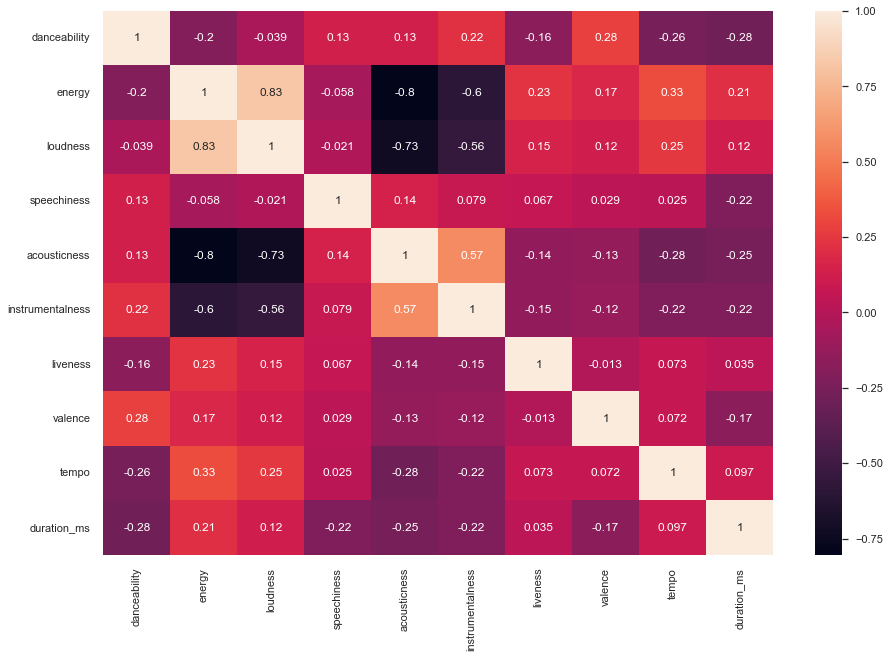

In [174]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(X.corr(), annot=True)

In [175]:
#detecting and saving high correleted features
high_corr_clm = []
corr_matrix=X.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
high_corr_clm =[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
high_corr_clm

['loudness', 'acousticness']

In [176]:
#dropping high correleted features
X.drop(high_corr_clm, axis=1, inplace=True)
X

,danceability,energy,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.741,0.8930,0.0384,0.000032,0.0371,0.733,122.056,185846
1,0.809,0.4630,0.0396,0.085000,0.1090,0.364,111.980,298941
2,0.617,0.6350,0.0317,0.000014,0.1640,0.446,103.019,247160
3,0.647,0.8530,0.0904,0.000000,0.0620,0.618,103.846,189000
4,0.738,0.5410,0.0303,0.000000,0.1100,0.657,94.949,245507
...,...,...,...,...,...,...,...,...
14748,0.453,0.1860,0.0517,0.883000,0.0692,0.502,145.369,205000
14749,0.411,0.1360,0.0436,0.935000,0.0903,0.503,151.248,255000
14750,0.387,0.0194,0.0436,0.846000,0.0738,0.298,108.269,219000
14751,0.219,0.0356,0.0476,0.907000,0.2020,0.214,81.562,220000


In [61]:
X.describe()

,danceability,energy,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
count,14753.000000,14753.000000,14753.000000,14753.000000,14753.000000,14753.000000,14753.000000,1.475300e+04
mean,0.527679,0.677159,0.086853,0.251334,0.204038,0.431301,124.458117,2.104737e+05
std,0.157866,0.278935,0.087333,0.359867,0.166981,0.230403,32.244586,9.091962e+04
min,0.000000,0.000782,0.000000,0.000000,0.000000,0.000000,0.000000,4.067000e+03
25%,0.418000,0.465000,0.039900,0.000009,0.099400,0.247000,96.556000,1.612560e+05
50%,0.527000,0.777000,0.055900,0.004440,0.133000,0.413000,125.073000,2.016000e+05
75%,0.642000,0.914000,0.094000,0.589000,0.273000,0.600000,146.875000,2.438800e+05
max,0.958000,1.000000,0.950000,0.999000,0.999000,0.978000,240.607000,1.413307e+06


In [177]:
#use stscaler and look
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.741,0.893,0.0384,0.000032,0.0371,0.733,122.056,185846
1,0.809,0.463,0.0396,0.085000,0.1090,0.364,111.980,298941
2,0.617,0.635,0.0317,0.000014,0.1640,0.446,103.019,247160
3,0.647,0.853,0.0904,0.000000,0.0620,0.618,103.846,189000
4,0.738,0.541,0.0303,0.000000,0.1100,0.657,94.949,245507


,danceability,energy,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
0,1.351329,0.773828,-0.554825,-0.698341,-0.999778,1.309486,-0.074499,-0.270882
1,1.782089,-0.767800,-0.541084,-0.462224,-0.569175,-0.292109,-0.386996,0.973061
2,0.565824,-0.151149,-0.631545,-0.698390,-0.239785,0.063801,-0.664913,0.403516
3,0.755866,0.630421,0.040614,-0.698430,-0.850654,0.810344,-0.639264,-0.236191
4,1.332325,-0.488156,-0.647576,-0.698430,-0.563186,0.979618,-0.915196,0.385335


In [63]:
X_scaled_df.describe()

,danceability,energy,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
count,1.475300e+04,1.475300e+04,1.475300e+04,1.475300e+04,1.475300e+04,1.475300e+04,1.475300e+04,1.475300e+04
mean,8.290739e-17,-9.960927e-16,1.810612e-17,7.807653e-15,1.345618e-16,1.115340e-16,1.115130e-15,-2.067798e-16
std,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00
min,-3.342694e+00,-2.424935e+00,-9.945341e-01,-6.984297e-01,-1.221967e+00,-1.872002e+00,-3.859945e+00,-2.270288e+00
25%,-6.947838e-01,-7.606295e-01,-5.376489e-01,-6.984051e-01,-6.266687e-01,-7.999318e-01,-8.653565e-01,-5.413502e-01
50%,-4.299988e-03,3.579469e-01,-3.544368e-01,-6.860914e-01,-4.254411e-01,-7.943113e-02,1.906997e-02,-9.760260e-02
75%,7.241921e-01,8.491166e-01,8.183710e-02,9.383400e-01,4.130070e-01,7.322172e-01,6.952374e-01,3.674393e-01
max,2.725962e+00,1.157442e+00,9.883686e+00,2.077687e+00,4.760959e+00,2.372875e+00,3.602243e+00,1.323008e+01


In [190]:
#Clustering the wines with K-Mean
kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=6, random_state=1234)

In [191]:
kmeans.labels_

array([1, 1, 1, ..., 5, 5, 5])

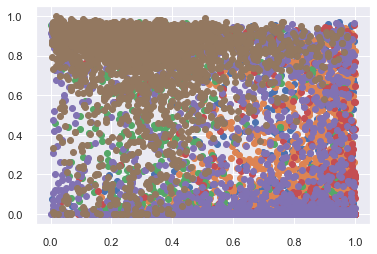

In [203]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [192]:
#Now we have our "model", let's get the clusters and how many observations has each cluster.

clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    3120
1    4549
2     799
3    1053
4    2424
5    2808
dtype: int64

In [201]:
X

,danceability,energy,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.741,0.8930,0.0384,0.000032,0.0371,0.733,122.056,185846,1
1,0.809,0.4630,0.0396,0.085000,0.1090,0.364,111.980,298941,1
2,0.617,0.6350,0.0317,0.000014,0.1640,0.446,103.019,247160,1
3,0.647,0.8530,0.0904,0.000000,0.0620,0.618,103.846,189000,1
4,0.738,0.5410,0.0303,0.000000,0.1100,0.657,94.949,245507,1
...,...,...,...,...,...,...,...,...,...
14748,0.453,0.1860,0.0517,0.883000,0.0692,0.502,145.369,205000,5
14749,0.411,0.1360,0.0436,0.935000,0.0903,0.503,151.248,255000,5
14750,0.387,0.0194,0.0436,0.846000,0.0738,0.298,108.269,219000,5
14751,0.219,0.0356,0.0476,0.907000,0.2020,0.214,81.562,220000,5


###Мы зафитили модель и теперь пробуем на практике

In [93]:
"""
#ТУТ ПРОБУЕМ на одной из песен скалерного датафрейма

#ЗДЕСЬ ПРОБУЕМ МОДЕЛь
#допустим одна из строк текущего дф это введенные данные пользователя 
song = list(X_scaled_df.iloc[1550, :])
song
#нужно перести пандас в nparray
song1 = np.array(song)
song1 = song1.reshape(1, -1)
song1
#смотрим что модель нам дает 
kmeans.predict(song1)
"""

C:\Users\Andrew R\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])

In [135]:
song

[-0.9608417781183518,
 0.9602572282375512,
 1.1238560316116837,
 -0.6984296791961958,
 -0.3835187049849636,
 -0.1922806224362486,
 1.9723012592410747,
 0.003039152366647316]

In [159]:
#Здесь добавляем обратно id чтобы опознать треки. НО жобавляем в дф уже с кластерами
#делаем лист названий дф
#df_columns_forfitdf = list(X.columns)
#df_columns_forfitdf.append('id')
#df_columns_forfitdf
#xdf = pd.concat([X,ids], sort=False, axis=1, ignore_index=True)
xdf.columns = df_columns_forfitdf
xdf

,danceability,energy,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,id
0,0.741,0.8930,0.0384,0.000032,0.0371,0.733,122.056,185846,1,5Xc74Dn1ZKH6H8XaVGOHXG
1,0.809,0.4630,0.0396,0.085000,0.1090,0.364,111.980,298941,1,5mCPDVBb16L4XQwDdbRUpz
2,0.617,0.6350,0.0317,0.000014,0.1640,0.446,103.019,247160,1,6RUKPb4LETWmmr3iAEQktW
3,0.647,0.8530,0.0904,0.000000,0.0620,0.618,103.846,189000,1,01k24g94i1JvkFLQmVEdCd
4,0.738,0.5410,0.0303,0.000000,0.1100,0.657,94.949,245507,1,7crMiinWx373rNBZBaVske
...,...,...,...,...,...,...,...,...,...,...
14748,0.453,0.1860,0.0517,0.883000,0.0692,0.502,145.369,205000,5,0GlTW20lKbXqdF3h2e90iy
14749,0.411,0.1360,0.0436,0.935000,0.0903,0.503,151.248,255000,5,61Z2e6jBU7eQuXZGI9brTa
14750,0.387,0.0194,0.0436,0.846000,0.0738,0.298,108.269,219000,5,0cXwSaRIMUoUxCY1oq4aLk
14751,0.219,0.0356,0.0476,0.907000,0.2020,0.214,81.562,220000,5,19WISSNBTYHfWOkPfTHtfH


In [184]:
#имитируем ввод юзера+удаляем два столбца(которые удаляли ранее в корреляции), и делаем стандартскелер
#после скармливаем модели и ищем по айди то что нам рекомендовали
###user_song = 3U8Fx7zNTQrctytkj6Gqgd
#get feature of this song
#user_song_feature = sp.audio_features('3U8Fx7zNTQrctytkj6Gqgd')
#u_song_todf = pd.DataFrame(user_song_feature)
#user_song_toscaler=u_song_todf[["danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","id","duration_ms"]]
#Deleting not int col чтоб скормить модели
#user_song_toscaler_withintonly=user_song_toscaler.drop(['id'], axis=1)
#user_song_toscaler_withintonly=user_song_toscaler_withintonly.drop(['acousticness'], axis=1)
#user_song_toscaler_withintonly=user_song_toscaler_withintonly.drop(['loudness'], axis=1)
#user_song_toscaler_withintonly_toscaler = user_song_toscaler_withintonly
#userr = scaler.transform(user_song_toscaler_withintonly_toscaler)
userr

array([[-1.99340013, -2.19255069, -0.45978373,  1.99432045, -0.80334165,
        -1.70533195, -1.84332128, -0.66353921]])

In [193]:
#пробуем добавить в модель юзер инпут
#нужно перести пандас в nparray
#song_tomodel = np.array(user_song_toscaler_withintonly_toscaler)
#song_tomodel = song_tomodel.reshape(1, -1)
song1
#смотрим что модель нам дает 
kmeans.predict(userr)

C:\Users\Andrew R\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([5])

In [196]:
#теперь сравниваем с предсказанным кластером и слушаем
xdf[xdf['cluster'] == 5].sample()
#xdf.columns

,danceability,energy,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,id
8806,0.587,0.158,0.0304,0.0771,0.4,0.349,128.943,96333,5,7myPwy9eGrRv9jNAoeTh2s


In [162]:
#юзаем скалер на очищенных данных пользователя А НАДО ЛИ ?
#scaler = StandardScaler()
#scaler.fit(user_song_toscaler_withintonly_toscaler)
#user_song_afterscal = scaler.transform(user_song_toscaler_withintonly_toscaler)
#user_song_afterscal_df = pd.DataFrame(user_song_afterscal)
#user_song_afterscal_df

In [198]:
#ПРОДОЛЖАЕТСЯ ПО МОДЕЛИ КОД 

#Now let's see to which group was assigned every wine.
X_withcl = X
X_withcl["cluster"] = clusters
X_withcl

,danceability,energy,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.741,0.8930,0.0384,0.000032,0.0371,0.733,122.056,185846,1
1,0.809,0.4630,0.0396,0.085000,0.1090,0.364,111.980,298941,1
2,0.617,0.6350,0.0317,0.000014,0.1640,0.446,103.019,247160,1
3,0.647,0.8530,0.0904,0.000000,0.0620,0.618,103.846,189000,1
4,0.738,0.5410,0.0303,0.000000,0.1100,0.657,94.949,245507,1
...,...,...,...,...,...,...,...,...,...
14748,0.453,0.1860,0.0517,0.883000,0.0692,0.502,145.369,205000,5
14749,0.411,0.1360,0.0436,0.935000,0.0903,0.503,151.248,255000,5
14750,0.387,0.0194,0.0436,0.846000,0.0738,0.298,108.269,219000,5
14751,0.219,0.0356,0.0476,0.907000,0.2020,0.214,81.562,220000,5


In [199]:
X[X['cluster'] == 0].sample()

,danceability,energy,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
1512,0.435,0.774,0.0631,0.0,0.127,0.448,147.466,228707,0


In [202]:
kmeans.inertia_

63618.4554874623

We have used K=8 by default for now - but we know that 8 might not be the optimal number of clusters for our dataset. Having a metric like inertia, we can compute it for several K values and then use the "elbow method" to choose the best K.

We will now leave all other parameters with their default value, since it seems to work pretty well.

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

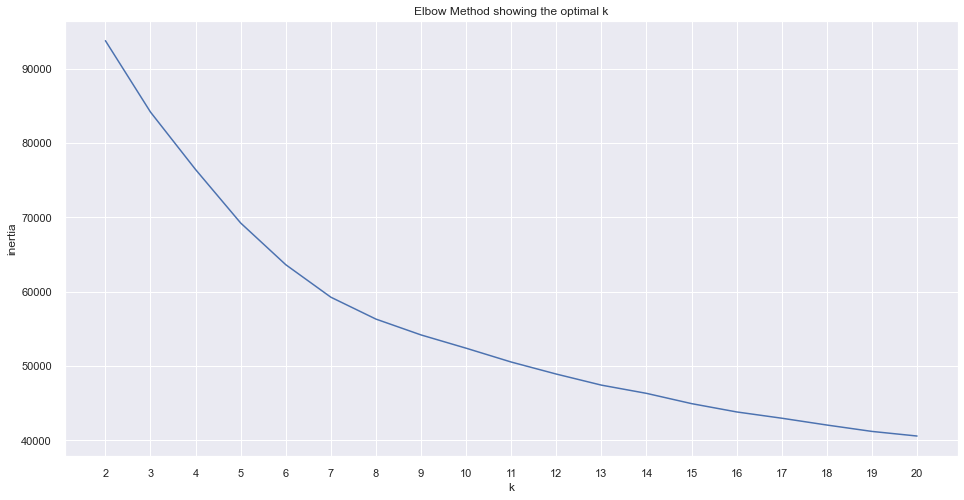

In [181]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

There seems to be an elbow at k=3, and then a very slight one at k=10, but other than that the plot is quite smooth. What if our business needs involve having a k between 5 and 8?

There is another metric that will help us decide.

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

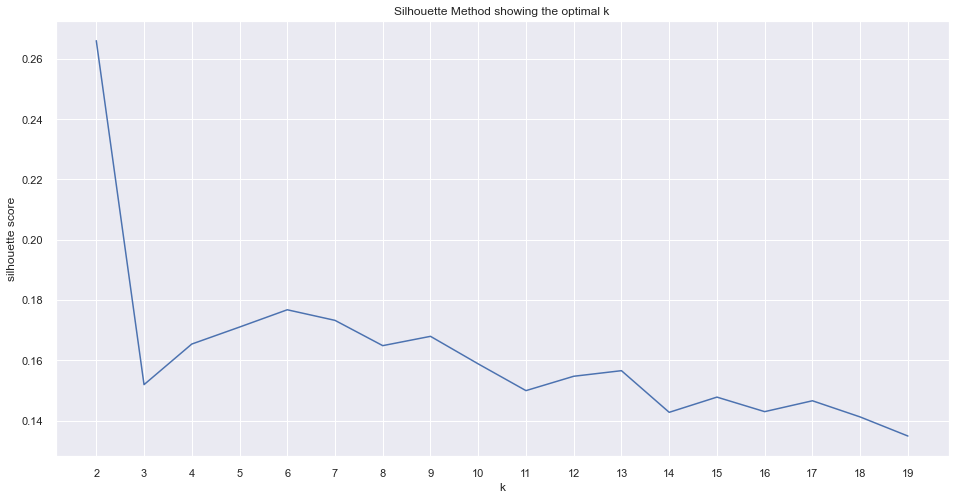

In [65]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

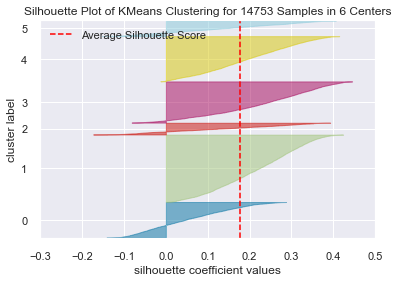

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 14753 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [71]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(6, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [27]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("Model/kmeans.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [24]:
kmeans

KMeans(n_clusters=19, random_state=1234)

In [26]:
import os
os.getcwd()

'C:\\Users\\Andrew R\\Documents\\GitHub\\LabsAndrew\\spoti_api_scr'